*IMPORT THE REQUIRED LIBRARY*

Here we import the required library to build the model for predicting weather a person will suffer from diabeties or not in the coming years given his/her data such as number of pregnecies, plasma glucose concentration of 2 hours in an oral glucose, diastolic blood pressure (mm Hg), Triceps skin fold thickness (mm), 2-hour serum insulin (mm U/ml), Body mass index (weight in kg/ (height in m)^2), diabetes pedigree function and age.

In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from keras.layers import Activation, Dense, Dropout
import matplotlib as mlp


The dataset is download from the pima-indians-diabetes from kaggle.

The link to the dataset is given as follows:
https://www.kaggle.com/datasets/kumargh/pimaindiansdiabetescsv?select=pima-indians-diabetes.csv

In [4]:
db = pd.read_excel('pima-indians-diabetes.xlsx')
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


The pima-indians-diabetes dataset is shown above.

>Pregnancies = number of pregnecies

>Glucose = plasma glucose concentration of 2 hours in an oral glucose

>BloodPressure = diastolic blood pressure (mm Hg)

>SkinThickness = Triceps skin fold thickness (mm)

>Insulin = 2-hour serum insulin (mm U/ml)

>BMI = Body mass index (weight in kg/ (height in m)^2)

>Diabetes pedigree function = diabetes pedigree function

>Age = age of the person

>Class = Target (1 person will suffer diabetes, 0 person will not suffer diabetes)

*Seperating the Inputs and outputs*

In [5]:
X = db.iloc[:, :-1]
Y = db.iloc[:, -1]

In [6]:
# The X and Y are split and it's shape is shown as below

print("the shape of X is", X.shape)
print("the shape of Y is", Y.shape)

the shape of X is (767, 8)
the shape of Y is (767,)


The eight(8) feature excluding the class target will be fed to the model as input value while the class will be taken as target value.

*We than split the data as Train-Test using the sklearn train_test_split function*

In [7]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, Y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)


To give a higher accuracy of the model we standardised the value of the feature using the Standardscaler from sklearn.prepossing.

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

*We build the model*.


Model building is the key of our prediction. Using sequential model we build the model. To also avoid the overfitting of the model we use the dropout layers in the model.

In [14]:
# checking to see if tensorflow is working. It also shows the working of GPU.

tf.test.gpu_device_name ()

'/device:GPU:0'

In [15]:
np.random.seed(42)
tf.random.set_seed(42)
 
model=Sequential()
model.add(Dense(15,input_dim=8, activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

# The model summary is shown below.
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 15)                135       
                                                                 
 dense_5 (Dense)             (None, 10)                160       
                                                                 
 dense_6 (Dense)             (None, 8)                 88        
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 392
Trainable params: 392
Non-trainable params: 0
_________________________________________________________________


*We train and test the model*

we use binary_crossentropy for loss function , optimizer as SGD (Stochastic Gradient Descent with defualt learning rate of 0.01),  and a metrics of accuracy.

In [16]:
model.compile(loss="binary_crossentropy", optimizer="SGD", metrics=['accuracy'])
model_history = model.fit(X_train, y_train, epochs=200, validation_data=(X_valid, y_valid))


Epoch 1/200
14/14 [==============================] - 4s 30ms/step - loss: 0.6954 - accuracy: 0.5267 - val_loss: 0.7034 - val_accuracy: 0.4861
Epoch 2/200
14/14 [==============================] - 0s 5ms/step - loss: 0.6876 - accuracy: 0.5568 - val_loss: 0.6888 - val_accuracy: 0.5903
Epoch 3/200
14/14 [==============================] - 0s 6ms/step - loss: 0.6747 - accuracy: 0.6311 - val_loss: 0.6770 - val_accuracy: 0.6250
Epoch 4/200
14/14 [==============================] - 0s 5ms/step - loss: 0.6663 - accuracy: 0.6427 - val_loss: 0.6677 - val_accuracy: 0.6736
Epoch 5/200
14/14 [==============================] - 0s 6ms/step - loss: 0.6640 - accuracy: 0.6404 - val_loss: 0.6600 - val_accuracy: 0.6944
Epoch 6/200
14/14 [==============================] - 0s 5ms/step - loss: 0.6592 - accuracy: 0.6589 - val_loss: 0.6532 - val_accuracy: 0.6875
Epoch 7/200
14/14 [==============================] - 0s 6ms/step - loss: 0.6521 - accuracy: 0.6613 - val_loss: 0.6473 - val_accuracy: 0.6597
Epoch 8/200


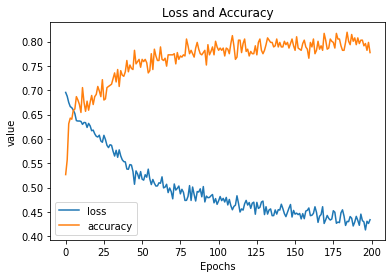

In [22]:
# we plot the loss and accuracy of the model
plt.title('Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('value')
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['accuracy'])
plt.legend(['loss', 'accuracy'])

*Prediction of the model*

Using the created model we predict the values of the X_test dataset.

In [42]:
# Accuracy and loss of the model is shown below:

pred_loss, pred_accu = model.evaluate(X_test, y_test)
print("the accuracy of the model is {1} and loss is {0}".format(pred_loss, pred_accu))



6/6 [==============================] - 0s 5ms/step - loss: 0.4586 - accuracy: 0.8021
the accuracy of the model is 0.8020833134651184 and loss is 0.4585844576358795


In [41]:
# we predict the values of the test data

for i in range(len(X_test)):
    print("the predicted value is {0} and the actual value is {1}".format(model.predict(X_test)[i], y_test.iloc[i]))

6/6 [==============================] - 0s 1ms/step
the predicted value is [0.18849592] and the actual value is 0
6/6 [==============================] - 0s 1ms/step
the predicted value is [0.15754968] and the actual value is 0
6/6 [==============================] - 0s 2ms/step
the predicted value is [0.09485916] and the actual value is 0
6/6 [==============================] - 0s 1ms/step
the predicted value is [0.40271845] and the actual value is 0
6/6 [==============================] - 0s 2ms/step
the predicted value is [0.07214991] and the actual value is 0
6/6 [==============================] - 0s 1ms/step
the predicted value is [0.18426442] and the actual value is 0
6/6 [==============================] - 0s 1ms/step
the predicted value is [0.12340648] and the actual value is 0
6/6 [==============================] - 0s 1ms/step
the predicted value is [0.33096635] and the actual value is 1
6/6 [==============================] - 0s 1ms/step
the predicted value is [0.6732774] and the ac

In [78]:
y_pred = model.predict(X_test)


6/6 [==============================] - 0s 2ms/step


In [89]:
# we plot the confusion matrix

con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred.round())
print("the confusion matrix is: ",con_mat)


the confusion matrix is:  tf.Tensor(
[[107  17]
 [ 21  47]], shape=(2, 2), dtype=int32)


In [82]:
!mkdir saved_model
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model\assets


*We have saved the model. In case if it is needed in the future we can directly load the train model*

The model for predicting weather a person has diabetes or not is created using tensorflow and the accuracy score of the model is : 0.8020833134651184.